#Trabajo Final Grupo Nº 2

Rafael Perez	rafaelperezctes@gmail.com
Olinca Ayala	olincayalan88@gmail.com
###@Created on Dec Sat 2 16:57:20 2023
###@author: Grupo Nº 2


# Modulo Gui

Este cuaderno realiza la descarga y análisis de secuencias nucleotídicas de integronas de Shewanella utilizando Biopython.




Este código descarga el dataset de secuencias de integrasas de Shewanella desde el NCBI. Luego, realiza un alineamiento múltiple de las secuencias para identificar las regiones conservadas. A continuación, selecciona un objetivo blanco para las guías CRISPR/Cas9. Finalmente, diseña las guías CRISPR/Cas9 y realiza la transformación de las bacterias de Shewanella que albergan integrones.

Para verificar la edición mediante secuenciación, se pueden diseñar primers específicos para la región editada. El código anterior muestra cómo diseñar primers para la región editada del gen de la integrasa.



**1. Breve introducción**

Los integrones son plataformas genéticas que se encuentran comúnmente en bacterias. Su función principal es la captura y la expresión de genes, los cuales están especialmente asociados con la resistencia a antibióticos. La tecnología CRISPR ha demostrado ser una herramienta poderosa para la edición genética precisa.

**2. Hipótesis de Trabajo y Resultados Esperados**

La hipótesis del proyecto es que el uso de CRISPR/Cas9 específicamente dirigido al gen de la integrasa en integrones de bacterias del género Shewanella puede resultar en la interrupción o desactivación de la función de recombinación de ADN de la integrasa. Se hipotetiza que al modificar el gen de la integrasa, se reducirá la capacidad de los integrones para capturar y expresar genes asociados con la resistencia a antibióticos en las bacterias de este género.

Los resultados esperados del proyecto son:

* Demostrar la capacidad de la tecnología CRISPR/Cas9 para dirigirse con precisión al gen de la integrasa de los integrones encontrados en Shewanella, evidenciando la capacidad de editar este gen de manera específica.
* Observar una disminución en la capacidad de los integrones modificados para realizar la recombinación del ADN, demostrando así la influencia de la edición genética en la función de la integrasa.
* Observar una reducción en la expresión de genes asociados con la resistencia a antibióticos en las bacterias de Shewanella portadoras de integrones editados.


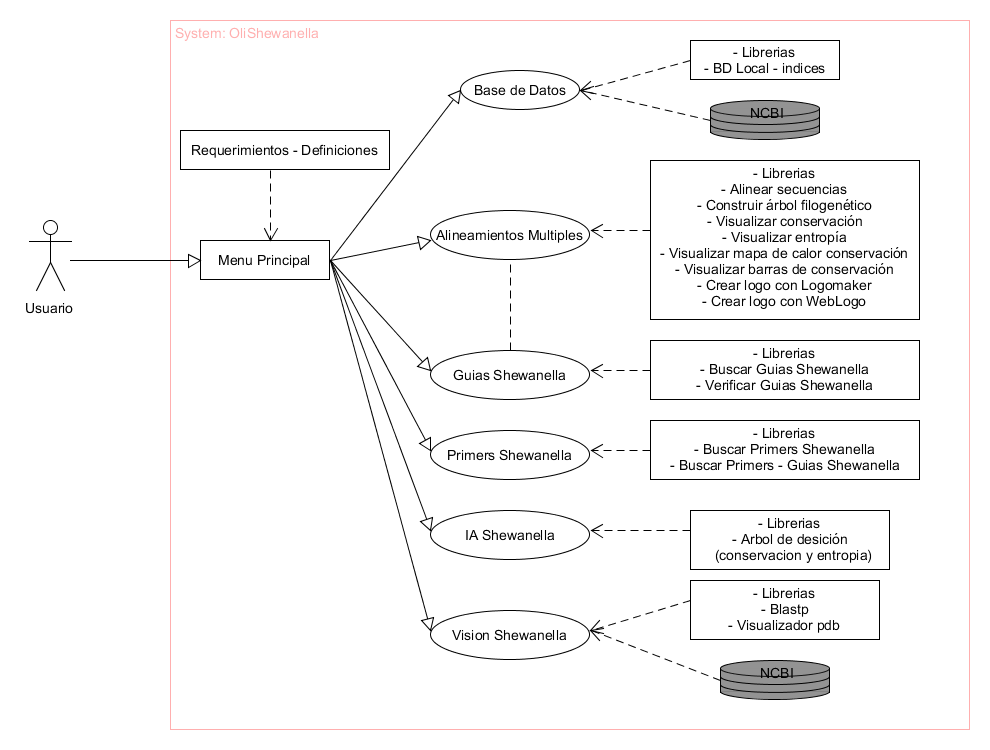

In [1]:
#@title clono el master olishewanella
import os
import subprocess

def clonar_o_actualizar_repositorio():
    repo_url = "https://github.com/olishewanella/master.git"
    repo_dir = "/content/master"
    global bandera_clonar
    # Verificar si el directorio ya existe
    if os.path.isdir(repo_dir):
        print(f"El directorio {repo_dir} ya existe. Actualizando el repositorio.")
        os.chdir(repo_dir)
        resultado_pull = subprocess.run(["git", "pull"], capture_output=True, text=True)
        print(resultado_pull.stdout)
    else:
        print(f"Clonando el repositorio en {repo_dir}.")
        resultado_clone = subprocess.run(["git", "clone", repo_url], capture_output=True, text=True)
        print(resultado_clone.stdout)
        os.chdir(repo_dir)

    # Listar los archivos en el directorio
    archivos = os.listdir(repo_dir)
    print("Archivos en el repositorio:")
    for archivo in archivos:
        print(archivo)
    bandera_clonar = True
# Ejecutar la función
bandera_clonar = False
clonar_o_actualizar_repositorio()


Clonando el repositorio en /content/master.

Archivos en el repositorio:
conceptos-biologia.docx
.git
VisionShewanella.ipynb
AMShewanella.ipynb
BDShewanella.ipynb
GuiasShewanella.ipynb
IAShewanella.ipynb
pruebas
LICENSE
PrimersShewanella.ipynb
README.md
caracteristicas_con_etiquetas.csv
GuiShewanella.ipynb


In [2]:
# @title Instalación de librerias
import subprocess
import ipywidgets as widgets
from IPython.display import display
import importlib

def instalar_librerias(b=""):
    #with output:
        librerias = [
            "import_ipynb",
            "nbconvert",
            "ipywidgets",  # Asegúrate de que ya esté instalado
            "biopython",
            "pandas",
            "numpy",
            "matplotlib",
            "tqdm"
        ]

        barra_progreso = widgets.IntProgress(
            value=0,
            min=0,
            max=len(librerias),
            bar_style='info',
            orientation='horizontal'
        )

        etiqueta = widgets.Label(value='Iniciando instalación...')
        display(widgets.VBox([etiqueta, barra_progreso]))

        for libreria in librerias:
            try:
                # Intenta importar la librería
                importlib.import_module(libreria)
                etiqueta.value = f"{libreria} ya está instalada."
            except ImportError:
                # Si la librería no está instalada, procede con la instalación
                etiqueta.value = f"Instalando: {libreria}..."
                subprocess.run(["pip", "install", libreria])
            finally:
                # Actualiza la barra de progreso independientemente de si la librería se instaló o no
                barra_progreso.value += 1

        etiqueta.value = 'Proceso de instalación completado.'

# Crear botón
#boton_instalar = widgets.Button(description='Instalar Librerías')

# Crear área de salida
#output = widgets.Output()

# Establecer controlador de eventos
#boton_instalar.on_click(instalar_librerias)

# Mostrar botón y área de salida
#display(boton_instalar, output)

#
#instalar_librerias()

In [3]:
def main():
    instalar_librerias()
    clonar_o_actualizar_repositorio()
main()

import sys
import io

# Guarda la salida estándar actual
#old_stdout = sys.stdout

# Redirige la salida estándar a un buffer
#sys.stdout = buffer = io.StringIO()

El directorio /content/master ya existe. Actualizando el repositorio.
Already up to date.

Archivos en el repositorio:
conceptos-biologia.docx
.git
VisionShewanella.ipynb
AMShewanella.ipynb
BDShewanella.ipynb
GuiasShewanella.ipynb
IAShewanella.ipynb
pruebas
LICENSE
PrimersShewanella.ipynb
README.md
caracteristicas_con_etiquetas.csv
GuiShewanella.ipynb


In [4]:
# constanstes # Variables globales p

archivo_multifasta = "secuencias_combinadas.fasta"
archivo_alineado = "/content/master/parte_0_alineado.fasta"
archivo_caracteristicas = "/content/caracteristicas_con_etiquetas.csv"
archivo_caracteristicas0 = "/content/caracteristicas_con_etiquetas0.csv"
archivo_arbol = "/content/master/arbol.nwk"
dicc_main = {}
seleccion_lista_archivos = None
nombre_lista_seleccionada = None
contenido_lista_seleccionada = None
import import_ipynb
from ipywidgets import Dropdown, Button, Output, VBox, Layout
from IPython.display import display,clear_output

In [5]:
#@title Funciones del módulo BDShewanella
import BDShewanella as bds

def ejecutar_main_bdshewanella(b=""):
  with area_visualizacion:
      clear_output(wait=True)
      # Crear un área de salida para mostrar mensajes
      salida = Output()
      print("ejecutando main de BDShewanella...")
      #import BDShewanella as bds
      global dicc_main
      bds.instalar_librerias()
      # aqui main que trae la lista de arcivos descargados
      dicc_main=bds.main()
      print("ejecución completada, main de BDShewanella...")
      display(salida)
#ejecutar_main_bdshewanella()

def mostrar_datos_bdshewanella(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    global dicc_main, nombre_lista_seleccionada, contenido_lista_seleccionada

    # Verificación y ejecución condicional
    if not dicc_main:
        ejecutar_main_bdshewanella()
    verificar_seleccion_inicial()

    # Crear dropdown para la selección de la lista
    dropdown = Dropdown(options=list(dicc_main.keys()), description='Listas:')

    # Crear un botón para confirmar la selección
    boton_confirmar = Button(description='Confirmar', layout=Layout(width='100px'))

    # Crear un área de salida para mostrar mensajes
    salida = Output()

    def al_seleccionar(b):
        global nombre_lista_seleccionada, contenido_lista_seleccionada
        nombre_lista_seleccionada = dropdown.value
        contenido_lista_seleccionada = dicc_main[nombre_lista_seleccionada]
        with salida:
            salida.clear_output()
            print(f"Ha seleccionado: {nombre_lista_seleccionada}")

    boton_confirmar.on_click(al_seleccionar)

    # Mostrar el widget y el botón
    display(VBox([dropdown, boton_confirmar, salida]))

def verificar_seleccion_inicial():
  with area_visualizacion:
    clear_output(wait=True)
    global nombre_lista_seleccionada, contenido_lista_seleccionada
    if nombre_lista_seleccionada is not None:
        print(f"Ya se ha seleccionado la lista: {nombre_lista_seleccionada}")
        print(contenido_lista_seleccionada)
    else:
        print("No se ha seleccionado ninguna lista de archivos.")

#mostrar_datos_bdshewanella(None)

importing Jupyter notebook from BDShewanella.ipynb


Output()

Output()

Output()

Output()

Output()

In [6]:
#@title Funciones del módulo AMShewanella
import AMShewanella as ams

def ejecutar_main_amshewanella(b=""):
  # importar modulos 2
  with area_visualizacion:
    clear_output(wait=True)
    ams.main()
    ams.combinar_en_multifasta(contenido_lista_seleccionada, archivo_multifasta)
    print("ejecución completada, main de AMShewanella...")

#ejecutar_main_amshewanella()
def alinear_secuencias_amshewanella(b=""):
    print("Alineando secuencias...")
    with area_visualizacion:
      clear_output(wait=True)
      ams.alinear_secuencias(archivo_multifasta,100)
      ams.extraer_caracteristicas_y_guardar(archivo_alineado, archivo_caracteristicas0)

# Funciones de visualización
def construir_arbol_filogenetico(b=""):
  from Bio import Phylo
  print("Construyendo árbol filogenético...")
  with area_visualizacion:
    clear_output(wait=True)
    arbol = ams.construir_arbol_con_mafft(archivo_alineado)
    if arbol:
        Phylo.draw(arbol)

#construir_arbol_filogenetico()
def visualizar_conservacion(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.graficar_conservacion(archivo_alineado)
    print("Visualización de conservación completada.")

def visualizar_entropia(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.graficar_entropia(archivo_alineado)
    print("Visualización de entropía completada.")

def visualizar_mapa_calor_conservacion(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.mapa_calor_conservacion(archivo_alineado)
    print("Mapa de calor de conservación completado.")

def visualizar_barras_conservacion(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.graficar_barras_conservacion(archivo_alineado)
    print("Gráfico de barras de conservación completado.")

def crear_logo_secuencias_logomaker(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.crear_logo_secuencias_logomaker(archivo_alineado, segmento=(420,480))
    print("Logo de secuencias con Logomaker completado.")

def crear_logo_secuencias_weblogo(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.crear_logo_secuencias_weblogo_cli(archivo_alineado, segmento=(420,480))
    print("Logo de secuencias con WebLogo completado.")



importing Jupyter notebook from AMShewanella.ipynb


Output()

In [7]:
#@title Funciones del módulo GuiasShewanella
all_guides_df = None
best_guides_df = None
import GuiasShewanella as gs

def ejecutar_main_guiasshewanella(b=""):
   with area_visualizacion:
    clear_output(wait=True)
    gs.main()

def buscar_guias_guiasshewanella(b=""):
   with area_visualizacion:
    clear_output(wait=True)
    global all_guides_df
    all_guides_df= gs.process_fasta_files(contenido_lista_seleccionada)
    gs.plot_guide_comparisons(all_guides_df)
    print(all_guides_df)

def verificar_guias_guiasshewanella(b=""):
 with area_visualizacion:
    clear_output(wait=True)
    #import importlib
    #importlib.reload(gs)
    global all_guides_df
    global best_guides_df
    #all_guides_df= gs.process_fasta_files(contenido_lista_seleccionada)
    best_guides_df = gs.select_best_guides_per_file(all_guides_df)
    gs.process_files(best_guides_df, all_guides_df)
    print("best_guides_df:--------------",best_guides_df)
    print("all_guides_df:----------------",all_guides_df)
#ejecutar_main_guiasshewanella()
#buscar_guias_guiasshewanella()


importing Jupyter notebook from GuiasShewanella.ipynb


Output()

In [8]:
#@title Funciones del módulo PrimersShewanella
import PrimersShewanella as ps
import GuiasShewanella as gs

def ejecutar_main_primersshewanella(b=""):
   with area_visualizacion:
    clear_output(wait=True)
    print("ejecutatando main primersshewanella \n")
    ps.main()

def buscar_primers_primersshewanella(b=""):
   with area_visualizacion:
    clear_output(wait=True)
    import importlib
    importlib.reload(ps)
    global all_guides_df
    all_guides_df= gs.process_fasta_files(contenido_lista_seleccionada)
    print("ejecutatando buscar primers primersshewanella \n")
    #print("all_guides_df:----------------",all_guides_df)
    ps.process_and_design_primers(contenido_lista_seleccionada)
    #gs.plot_guide_comparisons(all_guides_df)
    #print(all_guides_df)

def primers_guias_primersshewanella(b=""):
 with area_visualizacion:
    clear_output(wait=True)
    global all_guides_df
    global best_guides_df
    print("ejecutatando primers guias primersshewanella \n")
    all_guides_df= gs.process_fasta_files(contenido_lista_seleccionada)
    best_guides_df = gs.select_best_guides_per_file(all_guides_df)
    #print("best_guides_df:--------------",best_guides_df)
    #print("all_guides_df:----------------",contenido_lista_seleccionada)
    ps.primers_guias2(contenido_lista_seleccionada, best_guides_df)

#ejecutar_main_guiasshewanella()
#buscar_guias_guiasshewanella()
#boton_ejecutar_main_guiasshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)

importing Jupyter notebook from PrimersShewanella.ipynb


Output()

In [9]:
import IAShewanella as ias

def ejecutar_main_iashewanella(b=""):
   with area_visualizacion:
    clear_output(wait=True)
    print("ejecutatando main iashewanella \n")
    ias.main(archivo_caracteristicas0)

importing Jupyter notebook from IAShewanella.ipynb


Output()

In [10]:
#@title menu principal

import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import Layout, Button

# Estilo personalizado para los botones con colores más suaves
estilo_botones = Layout(width='200px', height='40px', border='solid 1px lightgray',
                        color='black',  # Color de texto
                        background_color='#a4c2f4',  # Color de fondo más claro
                        font_weight='bold', border_radius='5px')

area_visualizacion = widgets.Output()

# Funciones para las acciones de Herramientas Adicionales
def clonar_actualizar_repositorio(b):
    clear_output()
    print("Clonando o actualizando repositorio...")

def instalar_herramientas_visualizacion(b):
    clear_output()
    print("Instalando herramientas de visualización...")

# Función para mostrar el menú principal
def mostrar_menu_principal(b=None):
    clear_output()
    display(boton_bdshewanella, boton_amshewanella, boton_guiasshewanella, boton_primersshewanella, boton_iashewanella, boton_visionshewanella, boton_herramientas, boton_salir)

# Funciones para mostrar submenús
def mostrar_submenu_bdshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú BDShewanella"))
    display(boton_ejecutar_main_bdshewanella, boton_mostrar_datos_bdshewanella, boton_volver, area_visualizacion)

def mostrar_submenu_amshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú AMShewanella"), layout=estilo_botones)
    display(boton_ejecutar_main_amshewanella,boton_alinear_secuencias_amshewanella, boton_construir_arbol_filogenetico,boton_visualizar_conservacion, boton_visualizar_entropia, boton_visualizar_mapa_calor, boton_visualizar_barras_conservacion, boton_crear_logo_logomaker, boton_crear_logo_weblogo, boton_volver, area_visualizacion)

def mostrar_submenu_iasshewanell(b):
    clear_output()
    display(widgets.Label(value="Herramientas Adicionales"), layout=estilo_botones)
    display(boton_clonar_actualizar_repositorio, boton_instalar_herramientas_visualizacion, boton_volver, area_visualizacion)

def mostrar_submenu_herramientas(b):
    clear_output()
    display(widgets.Label(value="Herramientas Adicionales"), layout=estilo_botones)
    display(boton_clonar_actualizar_repositorio, boton_instalar_herramientas_visualizacion, boton_volver, area_visualizacion)

def mostrar_submenu_guiasshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú GuiasShewanella"))
    display(boton_ejecutar_main_guiasshewanella, boton_buscar_guiasshewanella, boton_verificar_guias_guiasshewanella, boton_volver, area_visualizacion)

def mostrar_submenu_primersshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú PrimersShewanella"))
    display(boton_ejecutar_main_primersshewanella, boton_buscar_primersshewanella, boton_primers_guias_primersshewanella, boton_volver, area_visualizacion)

def mostrar_submenu_iashewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú IAShewanella"))
    display(boton_ejecutar_main_iashewanella, boton_volver, area_visualizacion)

def mostrar_submenu_visionshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú VisionShewanella"))

# Crear botones para las acciones de GuiasShewanella
boton_ejecutar_main_guiasshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)
boton_buscar_guiasshewanella = widgets.Button(description='Buscar Guias Cas9', layout=estilo_botones)
boton_verificar_guias_guiasshewanella = widgets.Button(description='Verificar Guias Cas9', layout=estilo_botones)

# Asignar funciones a los botones GuiasShewanella
boton_buscar_guiasshewanella.on_click(buscar_guias_guiasshewanella)
boton_ejecutar_main_guiasshewanella.on_click(ejecutar_main_guiasshewanella)
boton_verificar_guias_guiasshewanella.on_click(verificar_guias_guiasshewanella)

# Crear botones para las acciones de PrimersShewanella
boton_ejecutar_main_primersshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)
boton_buscar_primersshewanella = widgets.Button(description='Buscar Primers', layout=estilo_botones)
boton_primers_guias_primersshewanella = widgets.Button(description='Primers Guias Cas9', layout=estilo_botones)

# Asignar funciones a los botones PrimersShewanella
boton_buscar_primersshewanella.on_click(buscar_primers_primersshewanella)
boton_ejecutar_main_primersshewanella.on_click(ejecutar_main_primersshewanella)
boton_primers_guias_primersshewanella.on_click(primers_guias_primersshewanella)

# Crear botones para las acciones de BDShewanella
boton_ejecutar_main_bdshewanella = widgets.Button(description='Ejecutar Main BD', layout=estilo_botones)
boton_mostrar_datos_bdshewanella = widgets.Button(description='Mostrar Datos BD', layout=estilo_botones)

# Asignar funciones a los botones BDShewanella
boton_ejecutar_main_bdshewanella.on_click(ejecutar_main_bdshewanella)
boton_mostrar_datos_bdshewanella.on_click(mostrar_datos_bdshewanella)

# Crear botones para las acciones de IAShewanella
boton_ejecutar_main_iashewanella = widgets.Button(description='Ejecutar Main IA', layout=estilo_botones)

# Asignar funciones a los botones IAShewanella
boton_ejecutar_main_iashewanella.on_click(ejecutar_main_iashewanella)

# Crear botones para las acciones de AMShewanella
boton_ejecutar_main_amshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)
boton_alinear_secuencias_amshewanella = widgets.Button(description='Alinear Secuencias', layout=estilo_botones)
boton_construir_arbol_filogenetico = widgets.Button(description='Construir Árbol Filogenético', layout=estilo_botones)
boton_visualizar_conservacion = widgets.Button(description="Visualizar Conservación", layout=estilo_botones)
boton_visualizar_entropia = widgets.Button(description="Visualizar Entropía", layout=estilo_botones)
boton_visualizar_mapa_calor = widgets.Button(description="Mapa de Calor Conservación", layout=estilo_botones)
boton_visualizar_barras_conservacion = widgets.Button(description="Barras de Conservación", layout=estilo_botones)
boton_crear_logo_logomaker = widgets.Button(description="Crear Logo Logomaker", layout=estilo_botones)
boton_crear_logo_weblogo = widgets.Button(description="Crear Logo WebLogo", layout=estilo_botones)

# Asignar funciones a los botones AMShewanella
boton_alinear_secuencias_amshewanella.on_click(alinear_secuencias_amshewanella)
boton_ejecutar_main_amshewanella.on_click(ejecutar_main_amshewanella)
boton_construir_arbol_filogenetico.on_click(construir_arbol_filogenetico)
boton_visualizar_conservacion.on_click(visualizar_conservacion)
boton_visualizar_entropia.on_click(visualizar_entropia)
boton_visualizar_mapa_calor.on_click(visualizar_mapa_calor_conservacion)
boton_visualizar_barras_conservacion.on_click(visualizar_barras_conservacion)
boton_crear_logo_logomaker.on_click(crear_logo_secuencias_logomaker)
boton_crear_logo_weblogo.on_click(crear_logo_secuencias_weblogo)


# Crear botones para las acciones de Herramientas Adicionales
boton_clonar_actualizar_repositorio = widgets.Button(description='Clonar o Actualizar Repositorio', layout=estilo_botones)
boton_instalar_herramientas_visualizacion = widgets.Button(description='Instalar Herramientas de Visualización', layout=estilo_botones)

boton_clonar_actualizar_repositorio.on_click(clonar_actualizar_repositorio)
boton_instalar_herramientas_visualizacion.on_click(instalar_herramientas_visualizacion)

# Botón para volver al menú principal
boton_volver = widgets.Button(description="Volver al Menú Principal", layout=estilo_botones)
boton_volver.on_click(mostrar_menu_principal)

# Botones del menú principal
boton_bdshewanella = widgets.Button(description="Módulo BDShewanella", layout=estilo_botones)
boton_bdshewanella.on_click(mostrar_submenu_bdshewanella)

boton_amshewanella = widgets.Button(description="Módulo AMShewanella", layout=estilo_botones)
boton_amshewanella.on_click(mostrar_submenu_amshewanella)

boton_guiasshewanella = widgets.Button(description="Módulo GuiasShewanella", layout=estilo_botones)
boton_guiasshewanella.on_click(mostrar_submenu_guiasshewanella)

boton_primersshewanella = widgets.Button(description="Módulo PrimersShewanella", layout=estilo_botones)
boton_primersshewanella.on_click(mostrar_submenu_primersshewanella)

boton_iashewanella = widgets.Button(description="Módulo IAShewanella", layout=estilo_botones)
boton_iashewanella.on_click(mostrar_submenu_iashewanella)

boton_visionshewanella = widgets.Button(description="Módulo VisionShewanella", layout=estilo_botones)
boton_visionshewanella.on_click(mostrar_submenu_iashewanella)

boton_herramientas = widgets.Button(description="Herramientas Adicionales",layout=estilo_botones)
boton_herramientas.on_click(mostrar_submenu_herramientas)

boton_salir = widgets.Button(description="Salir",layout=estilo_botones)

# Mostrar menú principal
mostrar_menu_principal()


Button(description='Módulo BDShewanella', layout=Layout(border='solid 1px lightgray', height='40px', width='20…

Button(description='Módulo AMShewanella', layout=Layout(border='solid 1px lightgray', height='40px', width='20…

Button(description='Módulo GuiasShewanella', layout=Layout(border='solid 1px lightgray', height='40px', width=…

Button(description='Módulo PrimersShewanella', layout=Layout(border='solid 1px lightgray', height='40px', widt…

Button(description='Módulo IAShewanella', layout=Layout(border='solid 1px lightgray', height='40px', width='20…

Button(description='Módulo VisionShewanella', layout=Layout(border='solid 1px lightgray', height='40px', width…

Button(description='Herramientas Adicionales', layout=Layout(border='solid 1px lightgray', height='40px', widt…

Button(description='Salir', layout=Layout(border='solid 1px lightgray', height='40px', width='200px'), style=B…

In [13]:
from google.colab import _message
def run_cells_above():
    notebook = _message.blocking_request('get_ipynb', request='', timeout_sec=5)
    cells = notebook['ipynb']['cells']
    for cell in cells:
        if 'source' in cell and 'main()' in cell['source']:
            break
        elif 'cell_type' in cell and cell['cell_type'] == 'code':
            _message.blocking_request('execute_cell', {'cell_id': cell['metadata']['id']})
#run_cells_above()

In [14]:
# Importa las librerías necesarias
"""
import os
# Crea el archivo init.py
with open("init.py", "w") as f:
    # Escribe el contenido del archivo
    f.write("print('¡El archivo init.py se ha creado!')")
"""

# Insert the directory
"""
import sys
sys.path.insert(0,"/content/")
!ls
"""

# importar modulos opcion 2
"""
%run "/content/BDShewanella.ipynb"
"""

'\n%run "/content/BDShewanella.ipynb"\n'